In [1]:
import tifffile
import numpy as np
from matplotlib import pyplot as plt

In [2]:
with tifffile.TiffFile("../dataset/raw_data/volumedata.tif") as tif:
    print(len(tif.pages))
    print(tif.pages[0].sizes)
    data = tif.asarray()

1065
{'height': 1536, 'width': 2048}


In [3]:
data.shape

(1065, 1536, 2048)

In [4]:
with tifffile.TiffFile("/home/shov/projects/connectomics_segmentation/dataset/labeled_data/train/train_XZ/tr_seg_XZ.tif") as tif2:
    print(len(tif2.pages))
    print(tif2.pages[0].sizes)
    seg = tif2.asarray()

1
{'height': 600, 'width': 600}


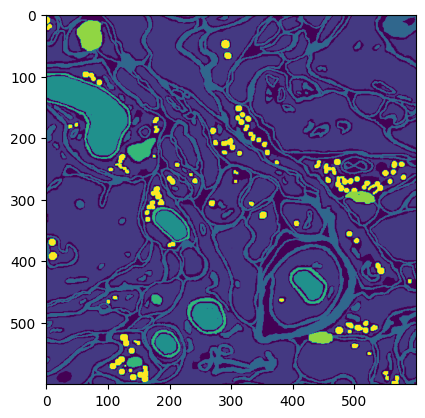

In [5]:
plt.imshow(seg)

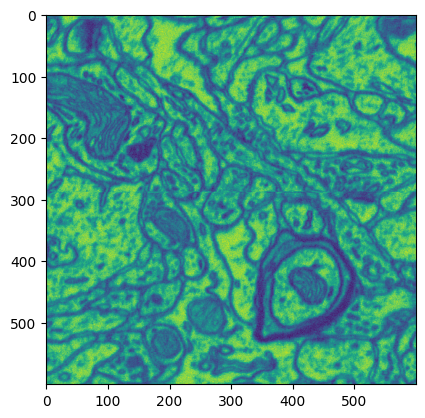

In [6]:
plt.imshow(data[150:750, 510, 510:1110])

In [7]:
classes = np.unique(seg)
classes

array([0, 1, 2, 3, 4, 5, 6], dtype=uint8)

In [8]:
class_idxs = []
for cls in classes:
    class_idxs.append(np.argwhere(seg == cls))
    print(class_idxs[-1].shape)

(91172, 2)
(167301, 2)
(71039, 2)
(13302, 2)
(5450, 2)
(2916, 2)
(8820, 2)


0 127.26601368841311
1 164.07233070932034
2 101.11272681203283
3 112.07946173507743
4 91.6394495412844
5 90.21604938271605
6 107.65521541950113


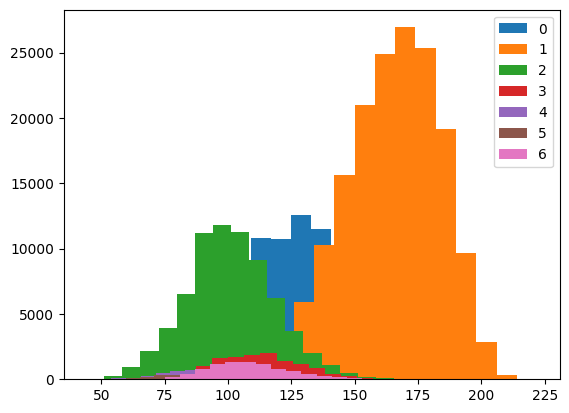

In [9]:
cls2vals = {}
for cls in classes:
    values = np.where(seg == cls, data[150:750, 510, 510:1110], -1).flatten()
    values = values[values >= 0]
    print(cls, values.mean())
    cls2vals[cls] = values
    plt.hist(values.flatten(), bins=20, label=cls)
plt.legend()

In [10]:
from scipy.stats import f_oneway, ttest_ind

In [11]:
f_oneway(*list(cls2vals.values()))

F_onewayResult(statistic=114695.2265232762, pvalue=0.0)

In [12]:
ttest_ind(cls2vals[3], cls2vals[6], equal_var=False)

TtestResult(statistic=19.61489755561215, pvalue=7.78531796093522e-85, df=19227.671916723655)

In [13]:
ttest_ind(cls2vals[4], cls2vals[6], equal_var=False)

TtestResult(statistic=-60.28428611465041, pvalue=0.0, df=12308.809347752556)

In [14]:
ttest_ind(cls2vals[4], cls2vals[5], equal_var=False)

TtestResult(statistic=3.8303090288542254, pvalue=0.0001294458433212023, df=5354.581188375277)

In [15]:
ttest_ind(cls2vals[2], cls2vals[6], equal_var=False)

TtestResult(statistic=-35.40065511680598, pvalue=1.3723363987894288e-260, df=11445.702832672643)